# Things to consider in an nlp project
#### 1-convert everything to lowercase
#### 2remove punctuation marks
#### 3Remove the brackets
#### 4remove line breaks \n
#### 5 remove stropwerd (unnecessary words)
#### 6 tokenize (make a list, put commas between them, separate words)
#### 7 Remove affixes and find roots with lemma and stema
#### 8 make to vectorize

In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
df=pd.read_csv('restaurant.csv')

In [3]:
df.head()


,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.corr(numeric_only=True)

,Unnamed: 0,stars,useful,funny,cool
Unnamed: 0,1.000000,0.014974,0.082662,0.064830,0.071627
stars,0.014974,1.000000,0.009373,0.019756,0.049066
useful,0.082662,0.009373,1.000000,0.917116,0.947522
funny,0.064830,0.019756,0.917116,1.000000,0.946281
cool,0.071627,0.049066,0.947522,0.946281,1.000000


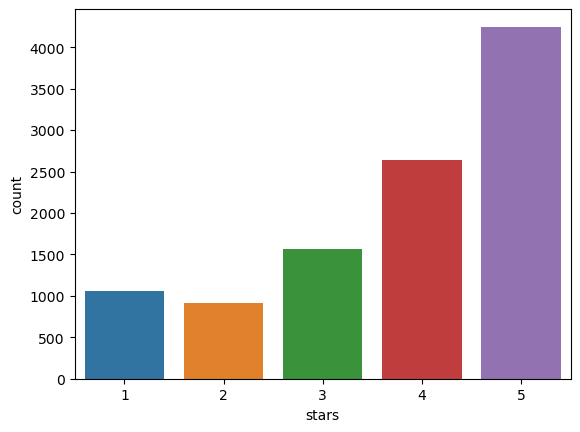

In [5]:
sns.countplot(x=df['stars']);

In [6]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [7]:
df['text']=df['text'].str.lower()
#convert everything to lowercase


In [8]:
df['text'][0]

"after getting food poisoning at the palms hotel, i was scared to eat at any more buffets. but we figured with the high price tag, the positive reviews etc, it was worth a chance. i'm really glad we gave it a try. (btw i uploaded a collage of the things we ate)\n\nthe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. totally worth it though.\n\nthe prime rib was the best ive ever had.\n\ni loved the sweet potato tots.\n\ni even have pho!\n\nthe music was great and so was our server alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\ni will return next trip in more comfortable shoes. after a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. thank you for an exquisite dinner."

### data preparation

In [9]:
df['text']=df['text'].str.replace('""','')
df['text']=df['text'].str.replace('(','')
df['text']=df['text'].str.replace(')','')
df['text']=df['text'].str.replace('-','')
df['text']=df['text'].str.replace('$','')
df['text']=df['text'].str.replace('','')
df['text']=df['text'].str.replace('*','')
df['text']=df['text'].str.replace('.','')
df['text']=df['text'].str.replace('!','')
df['text']=df['text'].str.replace(""""''""",'')
df['text']=df['text'].str.replace("'",'')
df['text']=df['text'].str.replace('''""''','')
df['text']=df['text'].str.replace('\n','')
#remove line breaks \n
df['text']=df['text'].str.replace('\d+','')
#Remove the brackets
df['text']=df['text'].str.replace('\r','')
df['text']=df['text'].str.replace("[^\w\s]",'')
#number 2-remove punctuation marks

In [10]:
df['text'][5]

'really enjoyed everything they had to offer its a good idea to start at the asian side and walk the whole buffet before you actually start picking out your food because there is so much to choose from we went on a tuesday night and then line was long dont know if its always like this but glad we were able to use the diamond status to skip the linethe seafood station always had people waiting but they were also constantly refilling the crab legs and oysters and stone crab claws and shrimp there was a guy complaining because they used to have hot crab legs which got moved to italian station and was really "crabby" about thatseriously, it was just a short walk away and the juices that they have in the mexican station were better than the juices that you can order when you sit downcarving station had lots to choose from and all was tasty went back for seconds on the lamb chopsdessert station was awesome gelato and freshmade crepes and cake pops after dessert i realized i forgot about the 

In [11]:
clas=df[(df.stars==1)|(df.stars==5)]

In [12]:
clas.head()
#there is an irregular queue and we have to regularize it.


,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17
5,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34
8,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19


In [13]:
clas.reset_index(drop=True,inplace=True)

In [14]:
clas.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
2,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17
3,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34
4,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19


In [15]:
clas=clas.drop('Unnamed: 0',axis=1)

In [16]:
clas=clas.drop('review_id',axis=1)

In [17]:
clas['date'] = clas['date'].str[10:]

In [18]:
clas['text'][3]

'really enjoyed everything they had to offer its a good idea to start at the asian side and walk the whole buffet before you actually start picking out your food because there is so much to choose from we went on a tuesday night and then line was long dont know if its always like this but glad we were able to use the diamond status to skip the linethe seafood station always had people waiting but they were also constantly refilling the crab legs and oysters and stone crab claws and shrimp there was a guy complaining because they used to have hot crab legs which got moved to italian station and was really "crabby" about thatseriously, it was just a short walk away and the juices that they have in the mexican station were better than the juices that you can order when you sit downcarving station had lots to choose from and all was tasty went back for seconds on the lamb chopsdessert station was awesome gelato and freshmade crepes and cake pops after dessert i realized i forgot about the 

##### Organized data 

## learn

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2,3,6))
# ngram_range=(1 word, 2 word , 3 word, 6 word : with reaading)

In [21]:
from nltk.stem  import PorterStemmer
pr=PorterStemmer

In [23]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,3),max_features=10000)
#max_fature , working with 10000 word

In [24]:
x=clas['text']
y=clas['stars']

In [25]:
import nltk

In [26]:
x=vect.fit_transform(x)
#number6-8

In [27]:
x

<5303x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 317566 stored elements in Compressed Sparse Row format>

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

### Verification

In [29]:
l=LogisticRegression()
d=DecisionTreeClassifier()

In [30]:
l.fit(x_train,y_train)

LogisticRegression()

In [31]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
pred=d.predict(x_test)

In [33]:
pred1=l.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(pred1,y_test)

0.9500471253534402

In [36]:
accuracy_score(pred1,y_test)

0.9500471253534402

In [37]:
from textblob import TextBlob as tb

In [38]:
tb('I love that').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [39]:
tb('very good food').sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

#### Polarity (Sentiment Intensity): 
A value indicating whether the emotional state of the text is positive, negative or neutral. The value range is between -1 and 1. Positive values represent positive emotions, negative values represent negative emotions and 0 represents a neutral emotion.

#### Subjectivity: 
A value indicating how subjective or objective the text is. The value range is between 0 and 1. 0 represents an objective text and 1 represents a very subjective text.

In [40]:
tb(df['text'][0]).sentiment

Sentiment(polarity=0.3373304473304473, subjectivity=0.5869264069264069)

In [41]:
tb(df['text'][6]).sentiment

Sentiment(polarity=0.15521541950113377, subjectivity=0.4327664399092971)

In [42]:
tb(clas['text'][4]).sentiment

Sentiment(polarity=0.225, subjectivity=0.44166666666666665)

In [43]:
tb(df['text'][35]).sentiment

Sentiment(polarity=0.16857993197278912, subjectivity=0.3770408163265306)

In [44]:
accuracy_score(pred1,y_test)

0.9500471253534402

In [45]:
randomdata= df.sample(n=1)['text'].iloc[0]

In [46]:
tb(randomdata).sentiment

Sentiment(polarity=0.1141420068027211, subjectivity=0.5293486394557824)

In [47]:
randomdata=df.sample(n=5)['text'].iloc[0]

In [48]:
tb(randomdata).sentiment

Sentiment(polarity=0.2539182194616977, subjectivity=0.6290458937198068)